In [13]:
import os, sys
sys.path.insert(0, "\\".join(os.path.abspath(os.curdir).split("\\")[:-2:]))

import matplotlib.pyplot as plt
from src.utils.utils import *
import seaborn as sns

plt.style.use("seaborn")

# Dicionário de metadados

## Função para Criar os gráficos

In [2]:
def create_bar(full, cmmd, ddsm, mias, label):
    fig = plt.figure(figsize=(14, 12))
    gs = fig.add_gridspec(3, 2)

    ax1 = plt.subplot(gs[0, ::])
    ax = full.plot.bar(x='frequencia', y=label, ax=ax1, rot=0, legend=False, yticks=range(0, 50, 5), fontsize=14)
    ax1.set_title(f"Quantidade de {label} por frequência - Total", size=18)
    ax1.set_xlabel("Frequência", size=16)
    ax1.set_ylabel(f"Quantidade de {label}", size=16)
    ax1.bar_label(ax.containers[0], fmt="%.01d", size=13, label_type="edge")

    ax2 = plt.subplot(gs[1:2, :1:])
    ax = cmmd.plot(kind='bar', x='frequencia', y=label, ax=ax2, rot=0, legend=False, fontsize=14,  yticks=range(0, 90, 10))
    ax2.set_title(f"Quantidade de {label} por frequência - CMMD", size=18)
    ax2.set_xlabel("Frequência", size=16)
    ax2.set_ylabel(f"Quantidade de {label}", size=16)
    ax2.bar_label(ax.containers[0], fmt="%.01d", size=13, label_type="edge")

    ax3 = plt.subplot(gs[1:2, 1::])
    ax = ddsm.plot(kind='bar', x='frequencia', y=label, ax=ax3, rot=0, legend=False, fontsize=14,  yticks=range(0, 45, 5))
    ax3.set_title(f"Quantidade de {label} por frequência - DDSM", size=18)
    ax3.set_xlabel("Frequência", size=16)
    ax3.set_ylabel(f"Quantidade de {label}", size=16)
    ax3.bar_label(ax.containers[0], fmt="%.01d", size=13, label_type="edge")

    ax4 = plt.subplot(gs[2:, :1:])
    ax = mias.plot(kind='bar', x='frequencia', y=label, ax=ax4, rot=0, legend=False, fontsize=14,  yticks=range(0, 45, 5))
    ax4.set_title(f"Quantidade de {label} por frequência - MIAS", size=18)
    ax4.set_xlabel("Frequência", size=16)
    ax4.set_ylabel(f"Quantidade de {label}", size=16)
    ax4.bar_label(ax.containers[0], fmt="%.01d", size=13, label_type="edge")

    plt.subplots_adjust(wspace=.2, hspace=.4)
    plt.show()

## Gráfico de tags do cabeçalho

### Quantidade de tags por frequência em cada banco

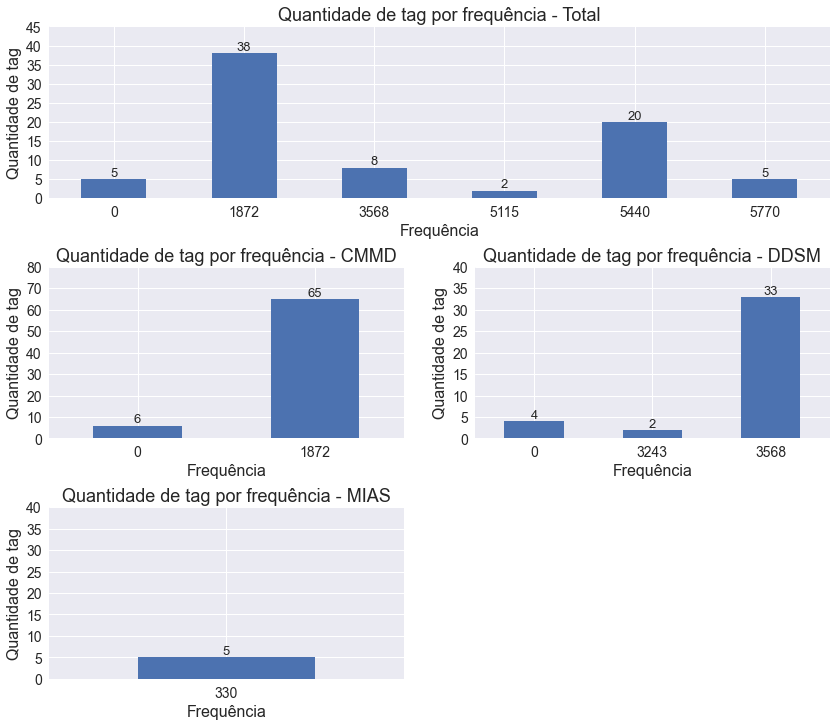

In [3]:
full_dictionary = load_json("full_dictionary_header", "../../metadata/dictionary_tags_header")
ddsm_dictionary = load_json("dictionary_header_DDSM", "../../metadata/dictionary_tags_header")
cmmd_dictionary = load_json("dictionary_header_CMMD", "../../metadata/dictionary_tags_header")
mias_dictionary = load_json("dictionary_header_MIAS", "../../metadata/dictionary_tags_header")

df_cmmd = create_df(cmmd_dictionary, 'tag')
df_ddsm = create_df(ddsm_dictionary, 'tag')
df_mias = create_df(mias_dictionary, 'tag')
df_full = create_df(full_dictionary, 'tag')

full = df_full.groupby("frequencia", as_index=False).count()
ddsm = df_ddsm.groupby("frequencia", as_index=False).count()
cmmd = df_cmmd.groupby("frequencia", as_index=False).count()
mias = df_mias.groupby("frequencia", as_index=False).count()

create_bar(full, cmmd, ddsm, mias, 'tag')

### Buscar tags pela frequência

In [4]:
"""---Opcões de parâmetros para função buscar_tags---
    Dataframe: df_full - Frequencias possíveis: [0, 1872, 3568, 5115, 5440, 5770]
    Dataframe: df_cmmd - Frequencias possíveis: [0, 1872]
    Dataframe: df_ddsm - Frequencias possíveis: [0, 3243, 3568]
    Dataframe: df_mias - Frequencias possíveis: [330]
"""
buscar_tags(df_full, 5440)

,tag,frequencia
0,"series_number (0020, 0011)",5440
1,"content_time (0008, 0033)",5440
2,"modality (0008, 0060)",5440
3,"patient_id (0010, 0020)",5440
4,"private_tag_data (0013, 1010)",5440
5,"study_instance_uid (0020, 000d)",5440
6,"private_tag_data (0013, 1013)",5440
7,"series_instance_uid (0020, 000e)",5440
8,"sop_instance_uid (0008, 0018)",5440
9,"specific_character_set (0008, 0005)",5440


## Gráfico de atributos dos arquivos CSV e TXT

### Quantidade de atributos por frequência em cada banco

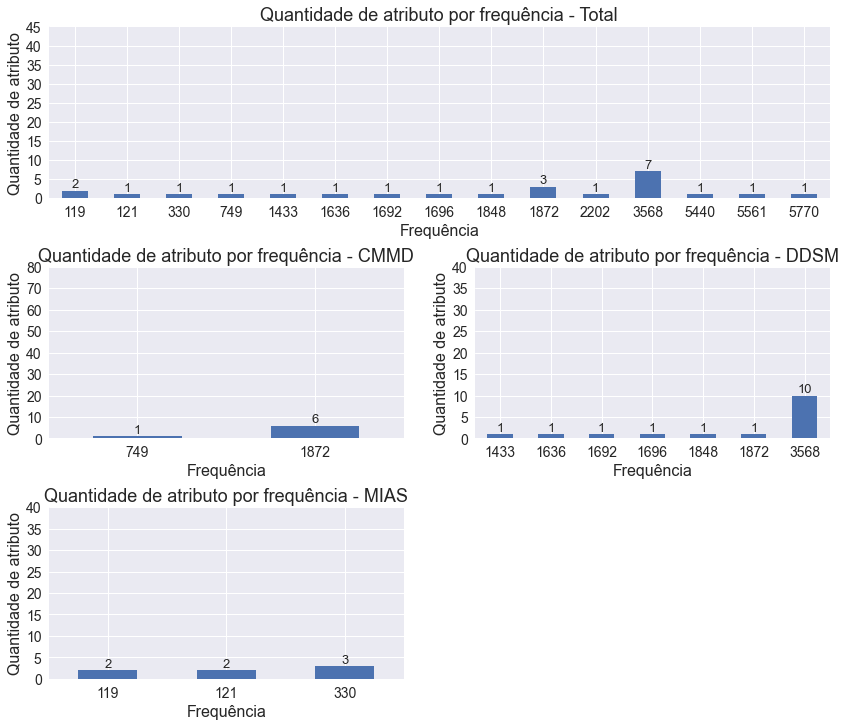

In [11]:
full_dictionary = load_json("full_dictionary_csv_txt", "../../metadata/dictionary_atributes_csv_txt")
ddsm_dictionary = load_json("dictionary_csv_DDSM", "../../metadata/dictionary_atributes_csv_txt")
cmmd_dictionary = load_json("dictionary_csv_CMMD", "../../metadata/dictionary_atributes_csv_txt")
mias_dictionary = load_json("dictionary_txt_MIAS", "../../metadata/dictionary_atributes_csv_txt")

df_cmmd = create_df(cmmd_dictionary, 'atributo')
df_ddsm = create_df(ddsm_dictionary, 'atributo')
df_mias = create_df(mias_dictionary, 'atributo')
df_full = create_df(full_dictionary, 'atributo')

full = df_full.groupby("frequencia", as_index=False).count()
ddsm = df_ddsm.groupby("frequencia", as_index=False).count()
cmmd = df_cmmd.groupby("frequencia", as_index=False).count()
mias = df_mias.groupby("frequencia", as_index=False).count()

create_bar(full, cmmd, ddsm, mias, 'atributo')

### Verificar Frequência de cada atributo - FULL Dictionary atributes

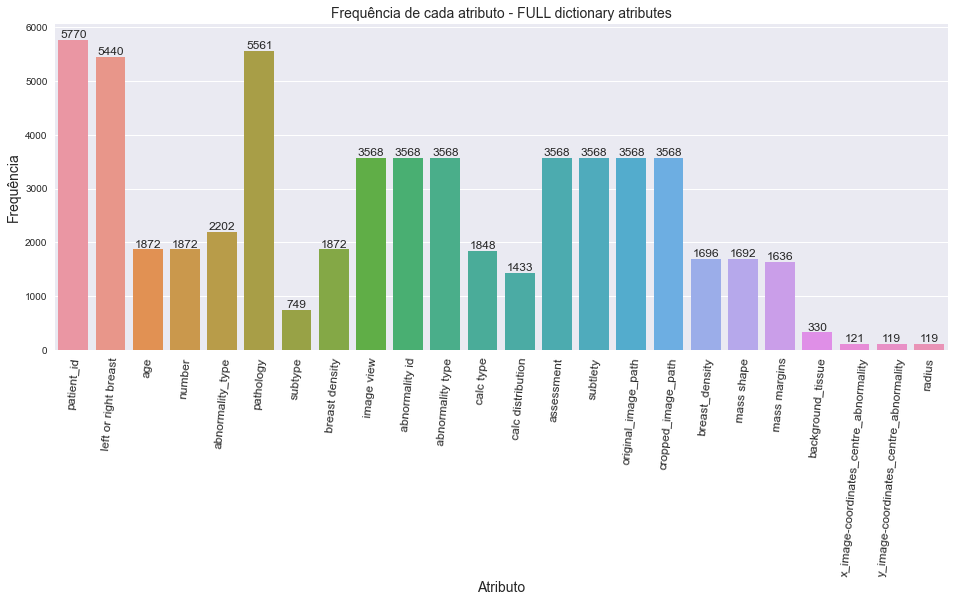

In [30]:
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df_full, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - FULL dictionary atributes", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=85, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - CMMD

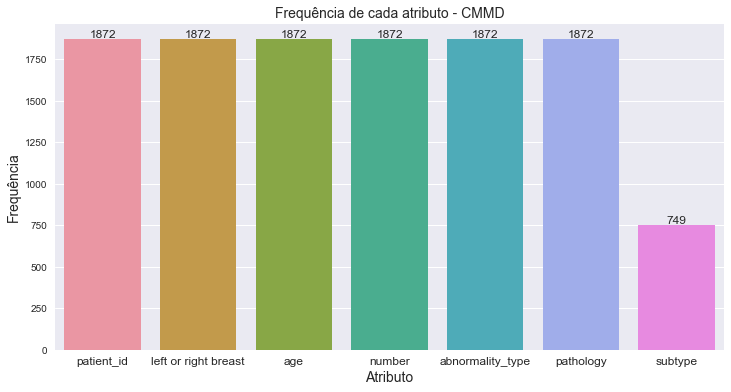

In [37]:
fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_cmmd, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - CMMD", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=0, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - DDSM

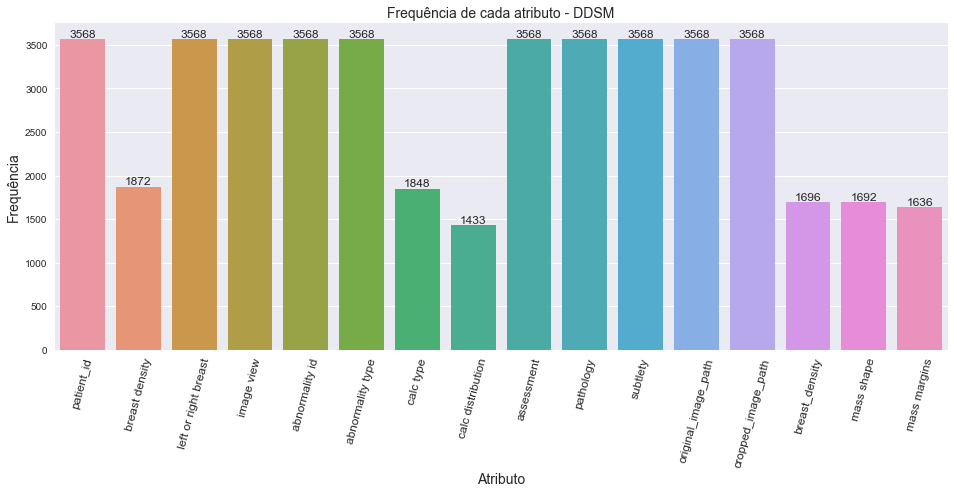

In [42]:
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df_ddsm, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - DDSM", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=75, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()

### Verificar Frequência de cada atributo - MIAS

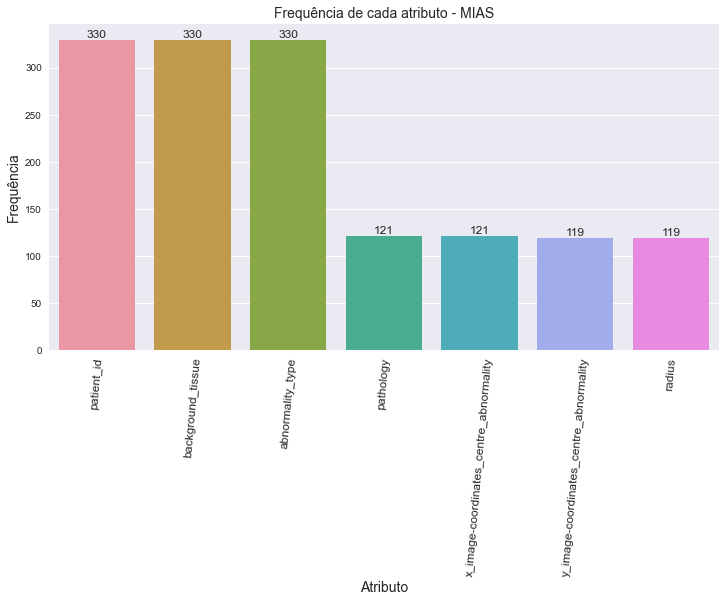

In [46]:
fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_mias, x='atributo', y='frequencia')
plt.title("Frequência de cada atributo - MIAS", size=14)
plt.xlabel("Atributo", size=14)
plt.ylabel("Frequência", size=14)
plt.xticks(rotation=85, size=12)
plt.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")

plt.show()